In [1]:
import pandas as pd
import numpy as np
import string
import re
from datetime import date

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [145]:
pets = pd.read_csv('pets.csv', index_col = "ID")
pets['PublishDate'] = pd.to_datetime(pets['PublishDate'])

In [146]:
pets['NoSpecialNeeds'] = np.where(pets['SpecialNeeds'].isnull(),True,False)
pets['GoodWithKids'] = np.where(pets['GoodWith'].str.contains('Children'),True,False)
pets['GoodWithDogs'] = np.where(pets['GoodWith'].str.contains('Dogs'),True,False)
pets['GoodWithCats'] = np.where(pets['GoodWith'].str.contains('Cats'),True,False)
pets['HouseTrained'] = np.where(pets['Attributes'].str.contains('House'),True,False)
pets=pets.drop(['GoodWith'],axis=1)

In [147]:
pets['DaysPosted'] = (date(2018,8,6) - pd.to_datetime(pets['PublishDate']).dt.date)/ np.timedelta64(1, 'D')

In [148]:
PerfectDogs = pets.loc[(pets['NoSpecialNeeds'] == True) & (pets['GoodWithKids'] == True) & (pets['GoodWithDogs'] == True) & \
         (pets['GoodWithCats'] == True) & (pets['HouseTrained'] == True)]

In [149]:
pets.head()

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,...,MixedBreed,Attributes,SpecialNeeds,AdoptionFee,NoSpecialNeeds,GoodWithKids,GoodWithDogs,GoodWithCats,HouseTrained,DaysPosted
ID,,,,,,,,,,,,,,,,,,,,,
42351895,Brody,SNARR Northeast,Say hello to your new best buddy Brody! This s...,Male,Puppy,Medium,White Plains,NY,10602,2018-08-01 08:48:26,...,True,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,450.0,True,False,True,False,True,5.0
42313510,Calliope,SNARR Northeast,Calliope is a very seeet dog who was given up ...,Female,Adult,Large,White Plains,NY,10602,2018-07-28 00:09:16,...,False,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,True,True,True,False,True,9.0
42301355,Oreo,SNARR Northeast,Meet Oreo! This cutie pie is looking for the p...,Male,Young,Small,White Plains,NY,10602,2018-07-27 02:24:15,...,True,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0,True,False,True,False,True,10.0
42301336,B-52,SNARR Northeast,Meet darling B-52! This handsome lovebug is re...,Male,Puppy,Medium,White Plains,NY,10602,2018-07-27 02:00:45,...,True,"['Spay/Neuter', 'Shots Current']",NaN,450.0,True,True,True,False,False,10.0
42301298,Tanqueray and Tequila (bonded pair),SNARR Northeast,Tanqueray and Tequila are a cutie pie brother-...,Female,Adult,Medium,White Plains,NY,10602,2018-07-27 01:44:44,...,True,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,300.0,True,True,True,False,True,10.0


***ANALYSIS***  
2. Look at data, create lists of most popular breeds, sizes
    - histograms of ages, post date
    - bar graphs of breeds, locations, sizes, health, other attributes
3. size vs. urban/suburban locations
4. Statistics:
    - which dogs get adopted faster?  (Breed, Size, Age, Coat)
    - which shelters have most adoptions??
5. Word cloud from all stories for each breed (top breeds)


In [150]:
topbreeds = pets['PrimaryBreed'].value_counts()[0:15]
topbreeds.index

Index(['Pit Bull Terrier', 'Labrador Retriever', 'Chihuahua', 'Hound',
       'Terrier', 'American Staffordshire Terrier', 'Shepherd', 'Boxer',
       'German Shepherd Dog', 'Beagle', 'Mixed Breed', 'American Bulldog',
       'Dachshund', 'Shih Tzu', 'Border Collie'],
      dtype='object')

In [160]:
## Seaborn plots ##
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

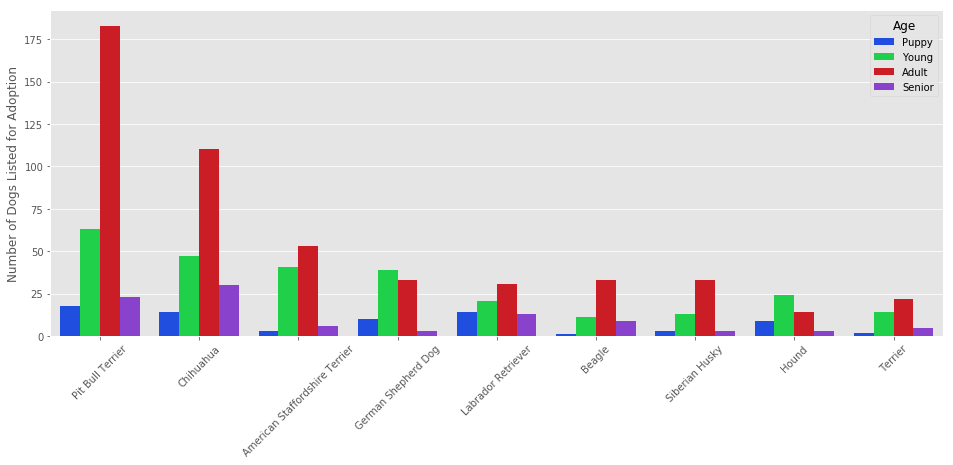

In [14]:
##Create bar plot of purebred dog breeds & number posted by age
#by location?

PureBreds = pets.loc[pets['PrimaryBreed'].isin(top_purebreds[0:9]) & pets['MixedBreed']==False]

plt.figure(figsize=(16,6))
g=sns.countplot(x ='PrimaryBreed',data=PureBreds, order=top_purebreds[0:9], \
              hue="Age", hue_order=("Puppy","Young","Adult","Senior"), palette = "bright")
g.set_xlabel("") 
g.set_ylabel("Number of Dogs Listed for Adoption")

plt.xticks(rotation=45)
#g.set_xticklabels(rotation=45)


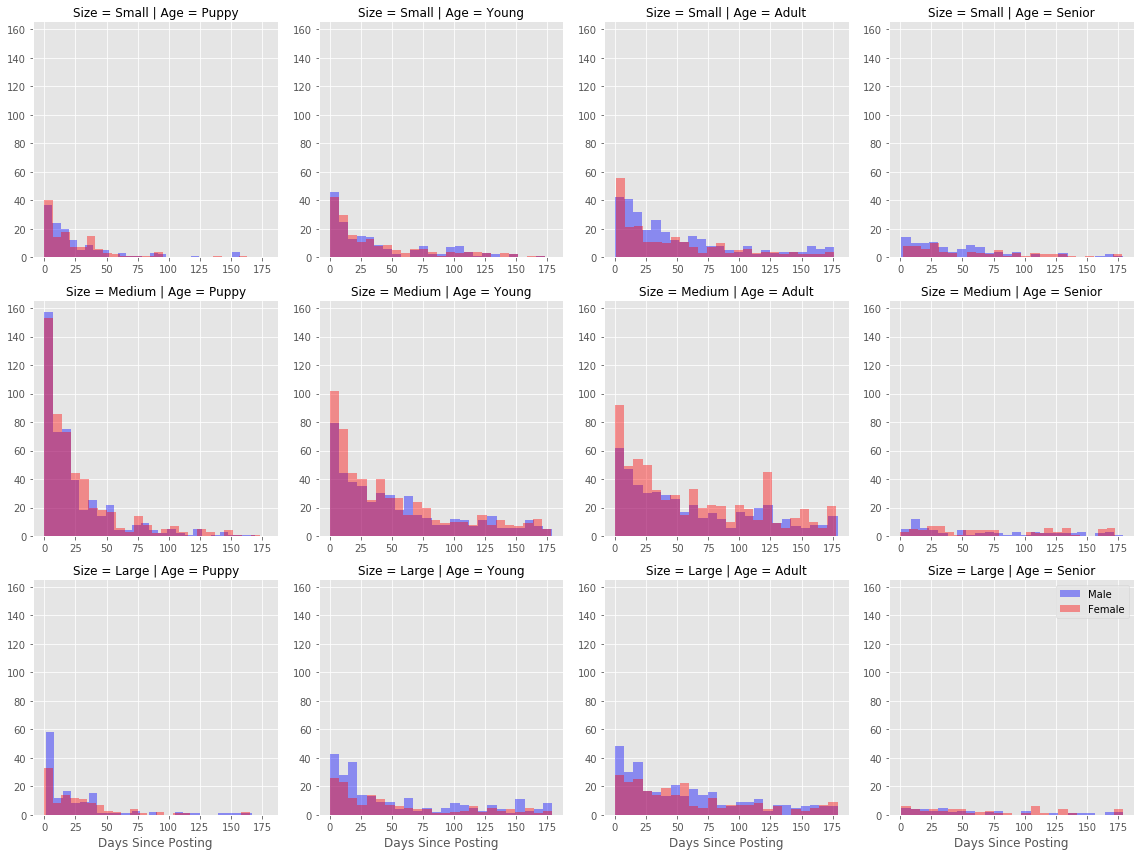

In [401]:
#Histograms of dogs by size, age, gender:

PostTime = sns.FacetGrid(pets[pets['DaysPosted'] < 180], col="Age", hue="Gender", row = "Size", \
                         palette=("blue","red"), size=4, row_order=("Small","Medium","Large"), \
                         col_order=("Puppy","Young","Adult","Senior"))
PostTime.map(sns.distplot, "DaysPosted", kde=False, bins = 24)
PostTime.set_xlabels("Days Since Posting") 
plt.legend()

#, xlabel = "Days Since Posting"   

/Users/Erin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([ 1782.,  1022.,   697.,   503.,   360.,   317.,   197.,   235.,
           223.,   164.,   145.,   143.,   139.]),
  array([ 1765.,  1011.,   691.,   493.,   353.,   300.,   193.,   230.,
           220.,   159.,   141.,   143.,   136.]),
  array([ 1217.,   659.,   451.,   339.,   213.,   193.,   113.,   131.,
           102.,    74.,    68.,    75.,    65.]),
  array([ 985.,  537.,  361.,  250.,  166.,  146.,   82.,  101.,   78.,
           43.,   49.,   56.,   41.]),
  array([ 495.,  317.,  234.,  195.,  167.,  137.,   80.,   96.,   84.,
           79.,   65.,   64.,   67.]),
  array([ 528.,  250.,  177.,  114.,   51.,   54.,   26.,   36.,   38.,
           27.,   26.,   18.,   10.])],
 array([   0.        ,   13.92307692,   27.84615385,   41.76923077,
          55.69230769,   69.61538462,   83.53846154,   97.46153846,
         111.38461538,  125.30769231,  139.23076923,  153.15384615,
         167.07692308,  181.        ]),
 <a list of 6 Lists of Patches objects>)

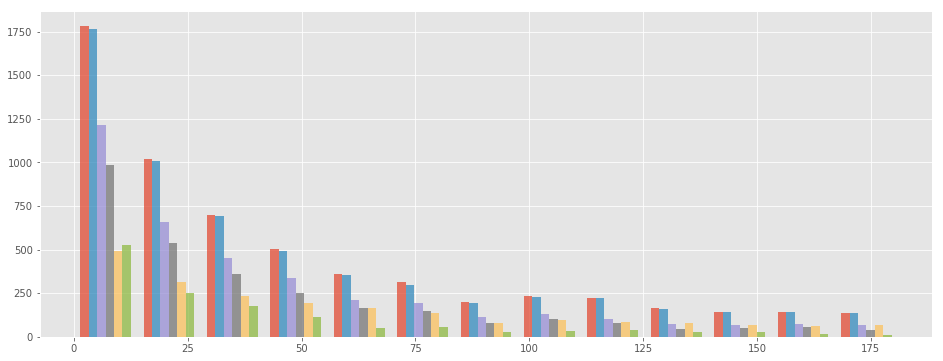

In [366]:
allpets = pets.loc[pets['DaysPosted'] < 182]#['DaysPosted']
NSN = pets.loc[(pets['NoSpecialNeeds'] == True) & (pets['DaysPosted'] < 182)]#['DaysPosted']
GWK = pets.loc[(pets['GoodWithKids'] == True) & (pets['DaysPosted'] < 182)]#['DaysPosted']
GWD = pets.loc[(pets['GoodWithDogs'] == True) & (pets['DaysPosted'] < 182)]#['DaysPosted']
GWC = pets.loc[(pets['GoodWithCats'] == True) & (pets['DaysPosted'] < 182)]#['DaysPosted']
HT = pets.loc[(pets['HouseTrained'] == True) & (pets['DaysPosted'] < 182)]#['DaysPosted']

a = allpets['DaysPosted']
b = GWK['DaysPosted']
c = GWD['DaysPosted']
d = GWC['DaysPosted']
e = HT['DaysPosted']
f = NSN['DaysPosted']

plt.figure(figsize=(16,6))
plt.legend()

#plt.hist([allpets,NSN,GWK,GWD,GWC,HT])
plt.hist([a,f,c,b,e,d],bins=13,alpha=0.75)

In [405]:
pets['WeeksPosted']=pets['DaysPosted']/7
pets.head()

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,...,Attributes,SpecialNeeds,AdoptionFee,NoSpecialNeeds,GoodWithKids,GoodWithDogs,GoodWithCats,HouseTrained,DaysPosted,WeeksPosted
ID,,,,,,,,,,,,,,,,,,,,,
42351895,Brody,SNARR Northeast,Say hello to your new best buddy Brody! This s...,Male,Puppy,Medium,White Plains,NY,10602,2018-08-01 08:48:26,...,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,450.0,True,False,True,False,True,5.0,0.714286
42313510,Calliope,SNARR Northeast,Calliope is a very seeet dog who was given up ...,Female,Adult,Large,White Plains,NY,10602,2018-07-28 00:09:16,...,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,True,True,True,False,True,9.0,1.285714
42301355,Oreo,SNARR Northeast,Meet Oreo! This cutie pie is looking for the p...,Male,Young,Small,White Plains,NY,10602,2018-07-27 02:24:15,...,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0,True,False,True,False,True,10.0,1.428571
42301336,B-52,SNARR Northeast,Meet darling B-52! This handsome lovebug is re...,Male,Puppy,Medium,White Plains,NY,10602,2018-07-27 02:00:45,...,"['Spay/Neuter', 'Shots Current']",NaN,450.0,True,True,True,False,False,10.0,1.428571
42301298,Tanqueray and Tequila (bonded pair),SNARR Northeast,Tanqueray and Tequila are a cutie pie brother-...,Female,Adult,Medium,White Plains,NY,10602,2018-07-27 01:44:44,...,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,300.0,True,True,True,False,True,10.0,1.428571


(0, 180)

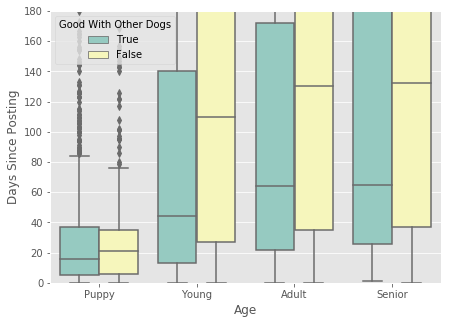

In [409]:
plt.figure(figsize=(7,5))        
sns.boxplot(x=pets["Age"], y="DaysPosted", order=["Puppy","Young","Adult","Senior"],
           hue="GoodWithDogs", data=pets, hue_order = (True,False), \
            palette = "Set3").set_ylabel('Days Since Posting')
plt.legend(loc=2,title="Good With Other Dogs")
plt.ylim(0, 180)

(0, 180)

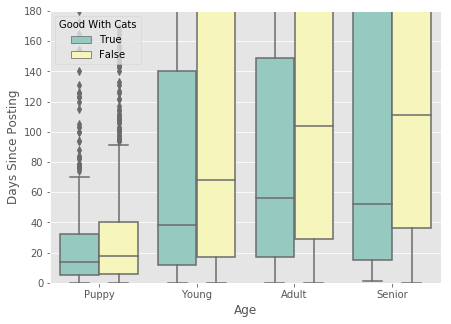

In [393]:
plt.figure(figsize=(7,5))        
sns.boxplot(x=pets["Age"], y="DaysPosted", order=["Puppy","Young","Adult","Senior"],
           hue="GoodWithCats", data=pets, hue_order = (True,False), \
            palette = "Set3").set_ylabel('Days Since Posting')
plt.legend(loc=2,title="Good With Cats")
plt.ylim(0, 180)

(0, 180)

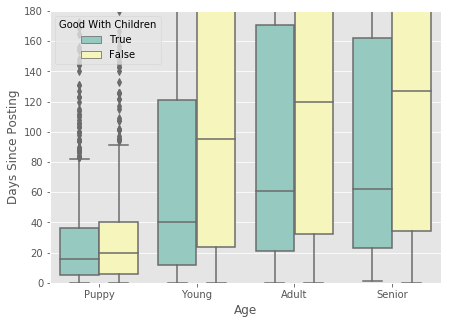

In [394]:
plt.figure(figsize=(7,5))        
sns.boxplot(x=pets["Age"], y="DaysPosted", order=["Puppy","Young","Adult","Senior"],
           hue="GoodWithKids", data=pets, hue_order = (True,False), \
            palette = "Set3").set_ylabel('Days Since Posting')
plt.legend(loc=2,title="Good With Children")
plt.ylim(0, 180)

(0, 180)

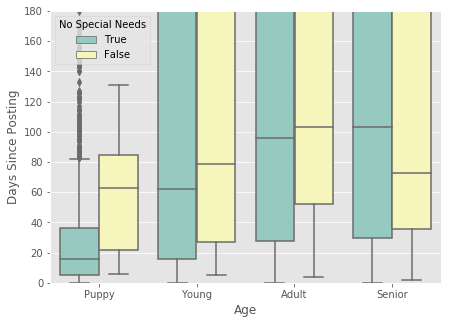

In [395]:
plt.figure(figsize=(7,5))        
sns.boxplot(x=pets["Age"], y="DaysPosted", order=["Puppy","Young","Adult","Senior"],
           hue="NoSpecialNeeds", data=pets, hue_order = (True,False), \
            palette = "Set3").set_ylabel('Days Since Posting')
plt.legend(loc=2,title="No Special Needs")
plt.ylim(0, 180)

(0, 180)

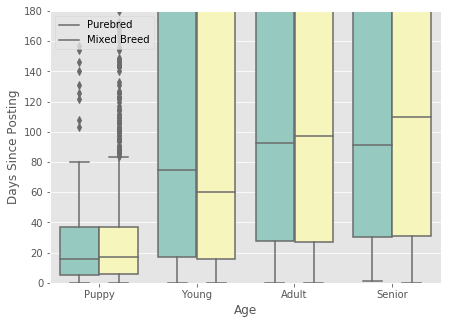

In [396]:
plt.figure(figsize=(7,5))        
sns.boxplot(x=pets["Age"], y="DaysPosted", order=["Puppy","Young","Adult","Senior"],
           hue="MixedBreed", data=pets, hue_order = (False,True), \
            palette = "Set3").set_ylabel('Days Since Posting')
plt.legend(loc=2,labels=['Purebred','Mixed Breed'])
plt.ylim(0, 180)

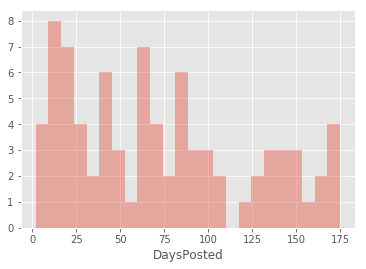

In [95]:
PBT = pets.loc[(pets['PrimaryBreed'] == 'Pit Bull Terrier') & (pets['MixedBreed']==False)]

h = PBT[(PBT['DaysPosted'] < 180) & (PBT['Age'] == 'Adult')]
sns.distplot(h['DaysPosted'], kde=False,bins = 24)

#Adoption rate for adult Pit Bull Terriers in NYC metro area:  (1 bin = 1 week)

In [ ]:
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
sns.lineplot(data=pets, palette="tab10", linewidth=2.5)

In [153]:
pets.loc[pets['DaysPosted'] <= 7]
pets.loc[(pets['DaysPosted'] >7) | (pets['DaysPosted'] <=28)]
pets.loc[(pets['DaysPosted'] >28) | (pets['DaysPosted'] <=180)]
pets.loc[pets['DaysPosted'] >180]



,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,...,MixedBreed,Attributes,SpecialNeeds,AdoptionFee,NoSpecialNeeds,GoodWithKids,GoodWithDogs,GoodWithCats,HouseTrained,DaysPosted
ID,,,,,,,,,,,,,,,,,,,,,
40004954,Thea,SNARR Northeast,"Hello humans, my name is Thea, and I am 1.5 ye...",Female,Young,Large,White Plains,NY,10602,2017-11-26 15:41:53,...,True,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0,True,False,False,False,True,253.0
39702558,Baby,Animal Welfare League of Westchester County…,Baby is a delightful little boy who is very lo...,Male,Young,Small,White Plains,NY,10602,2017-10-20 18:51:31,...,False,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,True,True,True,True,True,290.0
39630602,Pebbles,SNARR Northeast,Name: Pebbles\n\nApproximate Age: 1.5yrs (Born...,Female,Young,Medium,White Plains,NY,10602,2017-10-12 13:33:18,...,True,"['Spay/Neuter', 'Shots Current']",NaN,325.0,True,True,True,False,False,298.0
39630592,Balto,SNARR Northeast,Name: Balto\n\nApproximate Age: Approx. 1.5yrs...,Male,Young,Medium,White Plains,NY,10602,2017-10-12 13:28:32,...,True,"['Spay/Neuter', 'Shots Current']",NaN,NaN,True,True,True,False,False,298.0
39247796,Poet,SNARR Northeast,"Poet is a 3 yr old female, she is spayed, up t...",Female,Young,Large,White Plains,NY,10602,2017-08-29 17:29:00,...,True,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,True,True,True,False,True,342.0
38858939,Sparkplug,SNARR Northeast,Name: Sparkplug\n\nApproximate Age: 3yrs\n\nBr...,Female,Adult,Large,White Plains,NY,10602,2017-07-24 18:31:54,...,True,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,325.0,True,True,False,False,True,378.0
38050885,Skyy,SNARR Northeast,Name: Skyy\n\nApproximate Age: Approx. 2yrs ol...,Female,Young,Medium,White Plains,NY,10602,2017-05-12 13:20:17,...,True,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,True,True,False,False,True,451.0
37982940,Pandora,SNARR Northeast,This is Pandora. She is a Walker hound. She pr...,Female,Young,Medium,White Plains,NY,10602,2017-05-03 18:54:55,...,True,"['Spay/Neuter', 'Special needs', 'Shots Current']",NaN,NaN,True,True,True,False,False,460.0
37105821,Cass,SNARR Northeast,Name: Cassie\n\nApproximate Age: 6yrs\n\nBreed...,Female,Adult,Medium,White Plains,NY,10602,2017-01-03 18:38:37,...,True,"['House trained', 'Spay/Neuter', 'Shots Current']",NaN,325.0,True,False,False,False,True,580.0


In [63]:
#pets.loc[pets['MixedBreed']==0].loc[pets['PrimaryBreed']!='Mixed Breed']['PrimaryBreed'].value_counts().head(15)

pets.loc[pets['MixedBreed'] != True].head()

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,...,GoodWith,Attributes,SpecialNeeds,AdoptionFee,DaysPosted,GoodWithCats,HasSpecialneeds,GoodWithKids,GoodWithDogs,HouseTrained
ID,,,,,,,,,,,,,,,,,,,,,
42313510,Calliope,SNARR Northeast,Calliope is a very seeet dog who was given up ...,Female,Adult,Large,White Plains,NY,10602,2018-07-28 00:09:16,...,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,9.0,False,False,False,True,True
42282745,Camacho,Animal Welfare League of Westchester County…,Camacho is a real cutie. He is shy at first bu...,Male,Young,Small,White Plains,NY,10602,2018-07-25 11:17:44,...,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,12.0,False,False,False,True,True
42146734,Milo,Animal Welfare League of Westchester County…,Milo is extremely smart and loving. He's very ...,Male,Young,Small,White Plains,NY,10602,2018-07-11 18:05:17,...,"['Children', 'Other Dogs', 'Cats']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,26.0,True,False,False,True,True
41765036,Sammy,"Animal Welfare League of Westchester County, Inc.","Sammy is a very friendly, playful little boy. ...",Male,Young,Small,White Plains,NY,10602,2018-05-31 18:49:05,...,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter']",NaN,NaN,67.0,False,False,False,True,True
41468379,Butterball,SNARR Northeast,Sweet little Butterball!\nThis blind senior ha...,Female,Senior,Small,White Plains,NY,10602,2018-04-23 16:52:02,...,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Special need...",Blind and has Cushing’s Disease,NaN,105.0,False,True,False,True,True


In [8]:
#most popular purebred dogs
pets.loc[pets['MixedBreed']==0].loc[pets['PrimaryBreed']!='Mixed Breed']['PrimaryBreed'].value_counts().head()
top_purebreds = list(pets.loc[pets['MixedBreed']==0].loc[pets['PrimaryBreed']!='Mixed Breed']['PrimaryBreed'].value_counts()[0:19].index)
#top_purebreds

#use this list to sort descriptions & make word clouds

In [15]:
PureBreds

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,Coat,PrimaryBreed,SecondaryBreed,MixedBreed,GoodWith,Attributes,SpecialNeeds,AdoptionFee,DaysPosted
ID,,,,,,,,,,,,,,,,,,,
42313510,Calliope,SNARR Northeast,Calliope is a very seeet dog who was given up ...,Female,Adult,Large,White Plains,NY,10602,2018-07-28 00:09:16,Short,Bloodhound,NaN,False,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,9.0
42301355,Oreo,SNARR Northeast,Meet Oreo! This cutie pie is looking for the p...,Male,Young,Small,White Plains,NY,10602,2018-07-27 02:24:15,Medium,Shih Tzu,NaN,True,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0,10.0
42301336,B-52,SNARR Northeast,Meet darling B-52! This handsome lovebug is re...,Male,Puppy,Medium,White Plains,NY,10602,2018-07-27 02:00:45,Short,Border Collie,Boxer,True,"['Children', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,450.0,10.0
42301298,Tanqueray and Tequila (bonded pair),SNARR Northeast,Tanqueray and Tequila are a cutie pie brother-...,Female,Adult,Medium,White Plains,NY,10602,2018-07-27 01:44:44,Short,Pomeranian,Beagle,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,300.0,10.0
42301255,Tanqueray and Tequila (bonded pair),SNARR Northeast,Tanqueray and Tequila are a cutie pie brother-...,Male,Adult,Medium,White Plains,NY,10602,2018-07-27 01:43:11,Short,Pug,English Bulldog,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,300.0,10.0
42300874,Sherry,SNARR Northeast,Please meet sweet little Sherry! This pretty g...,Female,Puppy,Medium,White Plains,NY,10602,2018-07-26 23:18:00,Medium,Border Collie,Retriever,True,"['Children', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,450.0,11.0
42300858,Spritzer,SNARR Northeast,Sweet Spritzer is looking for a home to call h...,Male,Puppy,Medium,White Plains,NY,10602,2018-07-26 23:13:59,Medium,Border Collie,Retriever,True,"['Children', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,450.0,11.0
42300812,Whistle,SNARR Northeast,Lovely Whistle is looking for a home of her ow...,Female,Young,Medium,White Plains,NY,10602,2018-07-26 23:04:09,Short,Husky,NaN,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0,11.0
42300784,Cabo Wabo,SNARR Northeast,Adorable Cabo Wabo is looking for a home to ca...,Male,Young,Medium,White Plains,NY,10602,2018-07-26 22:55:49,Short,Greyhound,Labrador Retriever,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0,11.0


In [308]:
#Create word clouds from listing text for popular dog breeds

import nltk

# Uncomment the following lines the first time you run the code
#nltk.download('stopwords')
#nltk.download('wordnet')

from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /Users/Erin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Erin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [342]:

PitbullTerrier=pets.loc[(pets['PrimaryBreed']=='Pit Bull Terrier') | (pets['SecondaryBreed']=='Pit Bull Terrier')]
Chihuahua=pets.loc[pets['PrimaryBreed']=='Chihuahua'][['Name','Text']]
LabradorRetriever=pets.loc[pets['PrimaryBreed']=='Labrador Retriever'][['Name','Text']]

Dachshund=pets.loc[pets['PrimaryBreed']=='Dachshund'][['Name','Text']]

df = Chihuahua
df.head()

,Name,Text
ID,,
42282745,Camacho,Camacho is a real cutie. He is shy at first bu...
42112160,A Courtesy Post - Amity,"AMITY IS A COURTESY POST, NOT LOCATED AT PAWS ..."
33989561,Tiny and Shilo,Tiny and Shiloh are the happiest pups. Finding...
41536520,Bubba,Bubba is an approximately 6 years old. He is d...
42190507,Gillie,"Gillie is around 10 weeks old, a male, and a c..."


In [343]:
df['Text'] = df['Text'].fillna('')
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].apply(lambda x: re.sub('http\S*', '', x))
df['Text'] = df['Text'].apply(lambda x: re.sub('\s+', ' ', x))
df = df.loc[df['Text'] != ""]
df['Text'] = df['Text'].apply(lambda x: re.sub('[^\w\s]','', x)) 


In [344]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)
stop 
dogwords = ('dog','dogs','home','year','adoption','fee','years','old','fill','application','animal',\
            'alliance','im','hes','need','month')
stop.extend(dogwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [345]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [346]:
import os
from os import path
from PIL import Image

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
dog_mask = np.array(Image.open(path.join(d, "chihuahua_stencil.jpg")))


In [347]:
wc = WordCloud(background_color="white", max_words=2000, mask=dog_mask)
# generate word cloud
wc.generate(''.join(df['Text']))

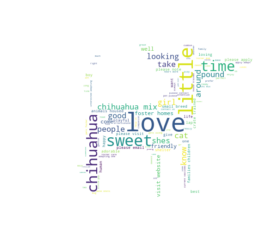

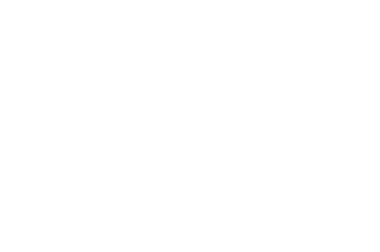

In [348]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

In [9]:
pets['City'].value_counts().head(10)

New York        709
Flushing        194
Freeport        179
Rockaway        145
Brooklyn        141
Feasterville    133
North Wales     115
Wantagh         110
Lambertville    110
Yardley          94
Name: City, dtype: int64

In [352]:
Bronx = [10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456,10454, 10455, 10459, 10474, \
         10463, 10471, 10466, 10469, 10470, 10475,10461,10462,10464, 10465, 10472, 10473]
Brooklyn = [11212, 11213, 11216, 11233, 11238, 11209, 11214, 11228,11204, 11218, 11219, 11230,11234, \
            11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231, 11203, 11210, \
            11225, 11226, 11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237]
Manhattan = [10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036, 10029, 10035, \
             10010, 10016, 10017, 10022, 10012, 10013, 10014, 10004, 10005, 10006, 10007, 10038, 10280, \
             10002, 10003, 10009, 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025, 10031, \
             10032, 10033, 10034, 10040]
Queens = [11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367, \
          11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, \
          11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, \
          11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11368, \
          11369, 11370, 11372, 11373, 11377, 11378]
StatenIsland = [10302, 10303, 10310, 10306, 10307, 10308, 10309, 10312, 10301, 10304, 10305, 10314]
NYC = Manhattan + Bronx+Brooklyn+Queens+StatenIsland

#pets[pets['Zip'].isin(NYC)]

/Users/Erin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

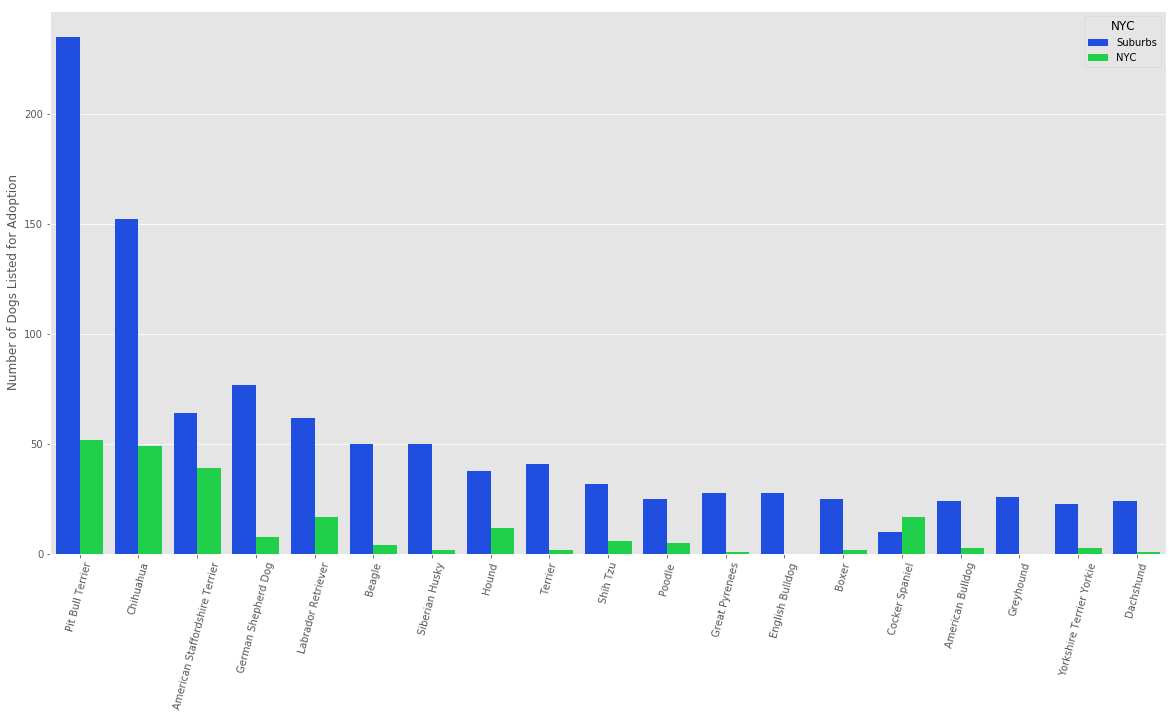

In [365]:
PureBreds = pets.loc[pets['PrimaryBreed'].isin(top_purebreds[0:19]) & pets['MixedBreed']==False]

PureBreds['NYC'] = np.where(PureBreds['Zip'].isin(NYC),"NYC","Suburbs")

plt.figure(figsize=(20,10))
g=sns.countplot(x ='PrimaryBreed',data=PureBreds, order=top_purebreds[0:19], \
              hue="NYC", palette = "bright")
g.set_xlabel("") 
g.set_ylabel("Number of Dogs Listed for Adoption")

plt.xticks(rotation=75)
#g.set_xticklabels(rotation=45)

#Compare types of dogs by borough, urban/suburban/rural 

In [410]:
pets['DaysPosted'].median()

55.5